Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1N3hd8BTFKz67hdKAwuY0KaWwhIhiQhjO/SeSAC_Final_Project_새싹무침/model/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-15 09:21:39.327126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 09:21:39.384558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 09:21:39.402011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS w

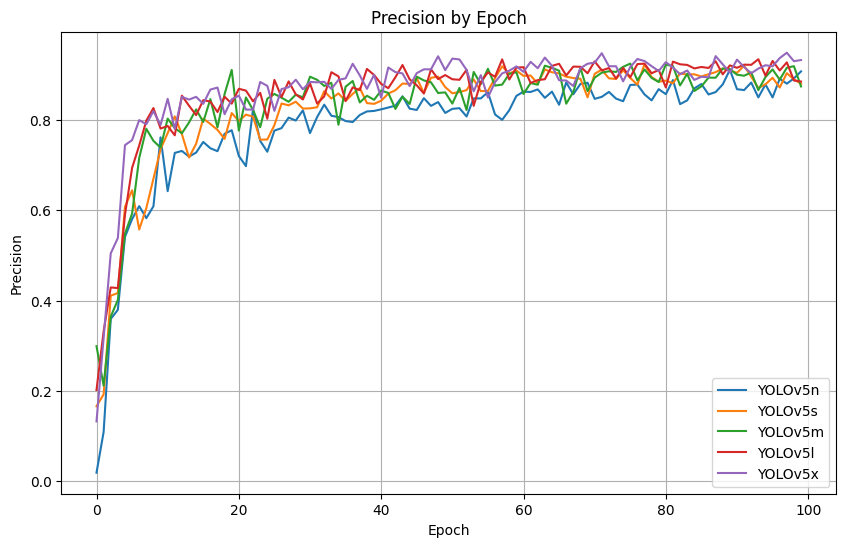

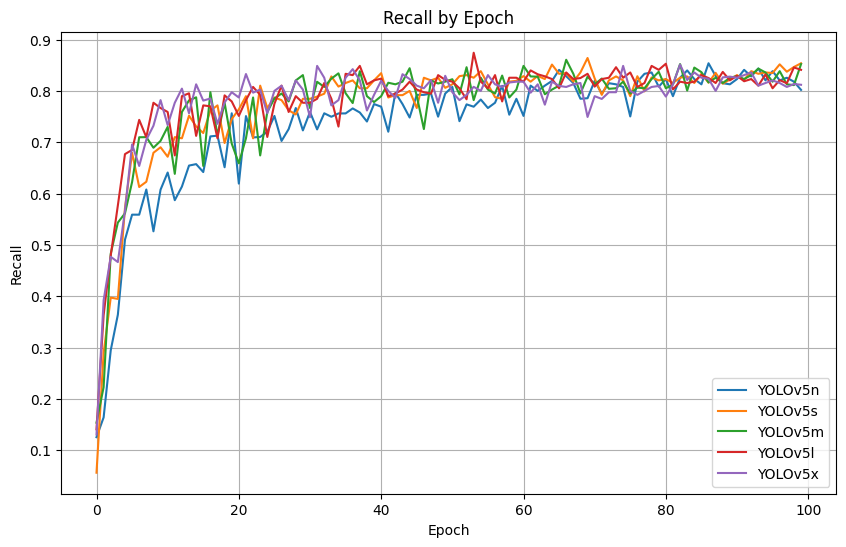

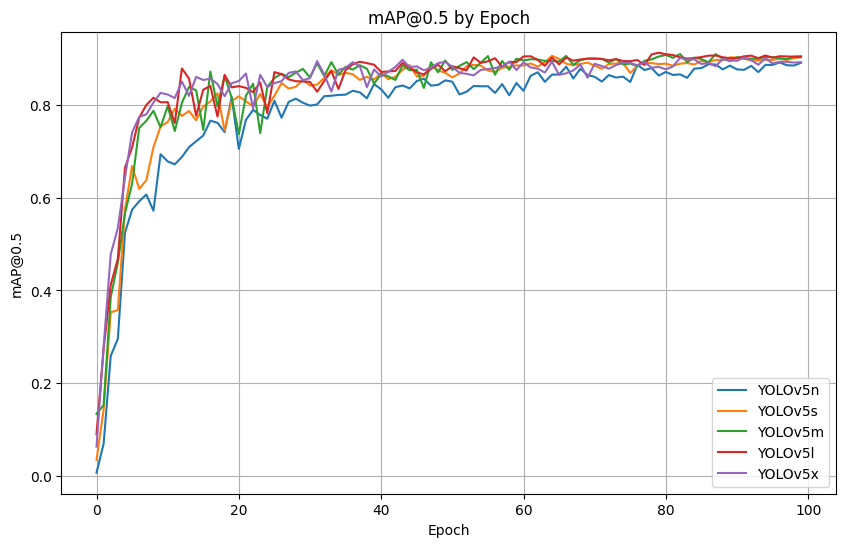

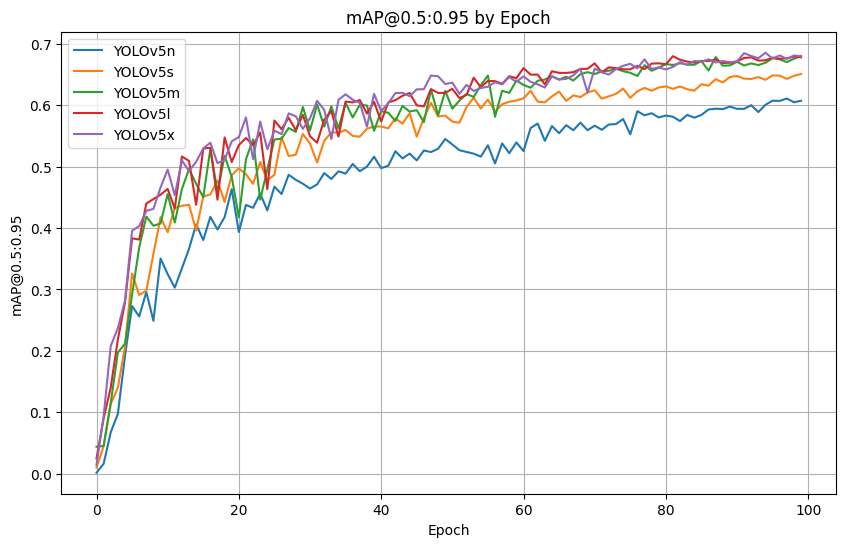

In [ ]:
# Google Drive 연결
from google.colab import drive
drive.mount('/content/drive')

# YOLOv5 디렉토리로 이동
%cd /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5

# 필요한 패키지 설치
!pip install -r requirements.txt

# YOLOv5 모델 훈련 (YOLOv5n, YOLOv5s, YOLOv5m, YOLOv5l, YOLOv5x 순서로 훈련)
# Nano 모델 훈련 코드 추가
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/pothole_8K.yaml --cfg yolov5n.yaml --weights yolov5n.pt --device 0
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/pothole_8K.yaml --cfg yolov5s.yaml --weights yolov5s.pt --device 0
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/pothole_8K.yaml --cfg yolov5m.yaml --weights yolov5m.pt --device 0
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/pothole_8K.yaml --cfg yolov5l.yaml --weights yolov5l.pt --device 0
!python train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/pothole_8K.yaml --cfg yolov5x.yaml --weights yolov5x.pt --device 0

# 성능 비교를 위한 결과 시각화
import os
import pandas as pd
import matplotlib.pyplot as plt

# 모델별 results.csv 파일 경로 설정
results_paths = {
    'YOLOv5n': '/content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/runs/train/exp4/results.csv',
    'YOLOv5s': '/content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/runs/train/exp7/results.csv',
    'YOLOv5m': '/content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/runs/train/exp9/results.csv',
    'YOLOv5l': '/content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/runs/train/exp8/results.csv',
    'YOLOv5x': '/content/drive/MyDrive/SeSAC_Final_Project_새싹무침/model/yolov5/runs/train/exp5/results.csv',
}

# 성능 지표를 저장할 딕셔너리
performance_metrics = {
    'epoch': [],
    'precision': [],
    'recall': [],
    'mAP_50': [],
    'mAP_50_95': [],
    'model': []
}

# 각 모델의 results.csv 파일에서 데이터를 읽어옴
for model_name, path in results_paths.items():
    if os.path.exists(path):
        df = pd.read_csv(path)

        # 열 이름에서 불필요한 공백 제거
        df.columns = df.columns.str.strip()

        # 성능 데이터를 딕셔너리에 추가
        performance_metrics['epoch'].extend(df['epoch'].values)
        performance_metrics['precision'].extend(df['metrics/precision'].values)
        performance_metrics['recall'].extend(df['metrics/recall'].values)
        performance_metrics['mAP_50'].extend(df['metrics/mAP_0.5'].values)
        performance_metrics['mAP_50_95'].extend(df['metrics/mAP_0.5:0.95'].values)
        performance_metrics['model'].extend([model_name] * len(df))
    else:
        print(f"파일 {path}이(가) 존재하지 않습니다. 해당 모델은 그래프에 포함되지 않습니다.")

# 데이터를 데이터프레임으로 변환
performance_df = pd.DataFrame(performance_metrics)

# 성능 그래프 그리기
def plot_metric(metric_name, ylabel, title):
    plt.figure(figsize=(10, 6))
    for model_name in results_paths.keys():
        model_data = performance_df[performance_df['model'] == model_name]
        plt.plot(model_data['epoch'], model_data[metric_name], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Precision 그래프
plot_metric('precision', 'Precision', 'Precision by Epoch')

# Recall 그래프
plot_metric('recall', 'Recall', 'Recall by Epoch')

# mAP@0.5 그래프
plot_metric('mAP_50', 'mAP@0.5', 'mAP@0.5 by Epoch')

# mAP@0.5:0.95 그래프
plot_metric('mAP_50_95', 'mAP@0.5:0.95', 'mAP@0.5:0.95 by Epoch')